# Create a 3D pedestrian

### Create the agent

In [1]:
from shapely.geometry import MultiPolygon

from configuration.models.agents import Agent
from configuration.models.measures import AgentMeasures
import configuration.utils.constants as cst

# Define the type of agent to be created (e.g., pedestrian)
agent_type = cst.AgentTypes.pedestrian

# Define a dictionary containing measurements specific to the agent type
measures = {
    "sex": "male",  # Specify the sex of the agent
    "bideltoid_breadth": 45.0,  # Shoulder breadth (cm)
    "chest_depth": 23.0,  # Chest depth (cm)
    "height": 180.0,  # Height of the agent (cm)
    "weight": 75.0,  # Weight of the agent (kg)
}

# Create an instance of AgentMeasures using the defined agent type and measurements
agent_measures = AgentMeasures(agent_type=agent_type, measures=measures)

# Create an instance of Agent using the defined agent type and measures object
current_agent = Agent(agent_type=agent_type, measures=agent_measures)

### Plot the 3D pedestrian

#### Plot the orthogonal projection

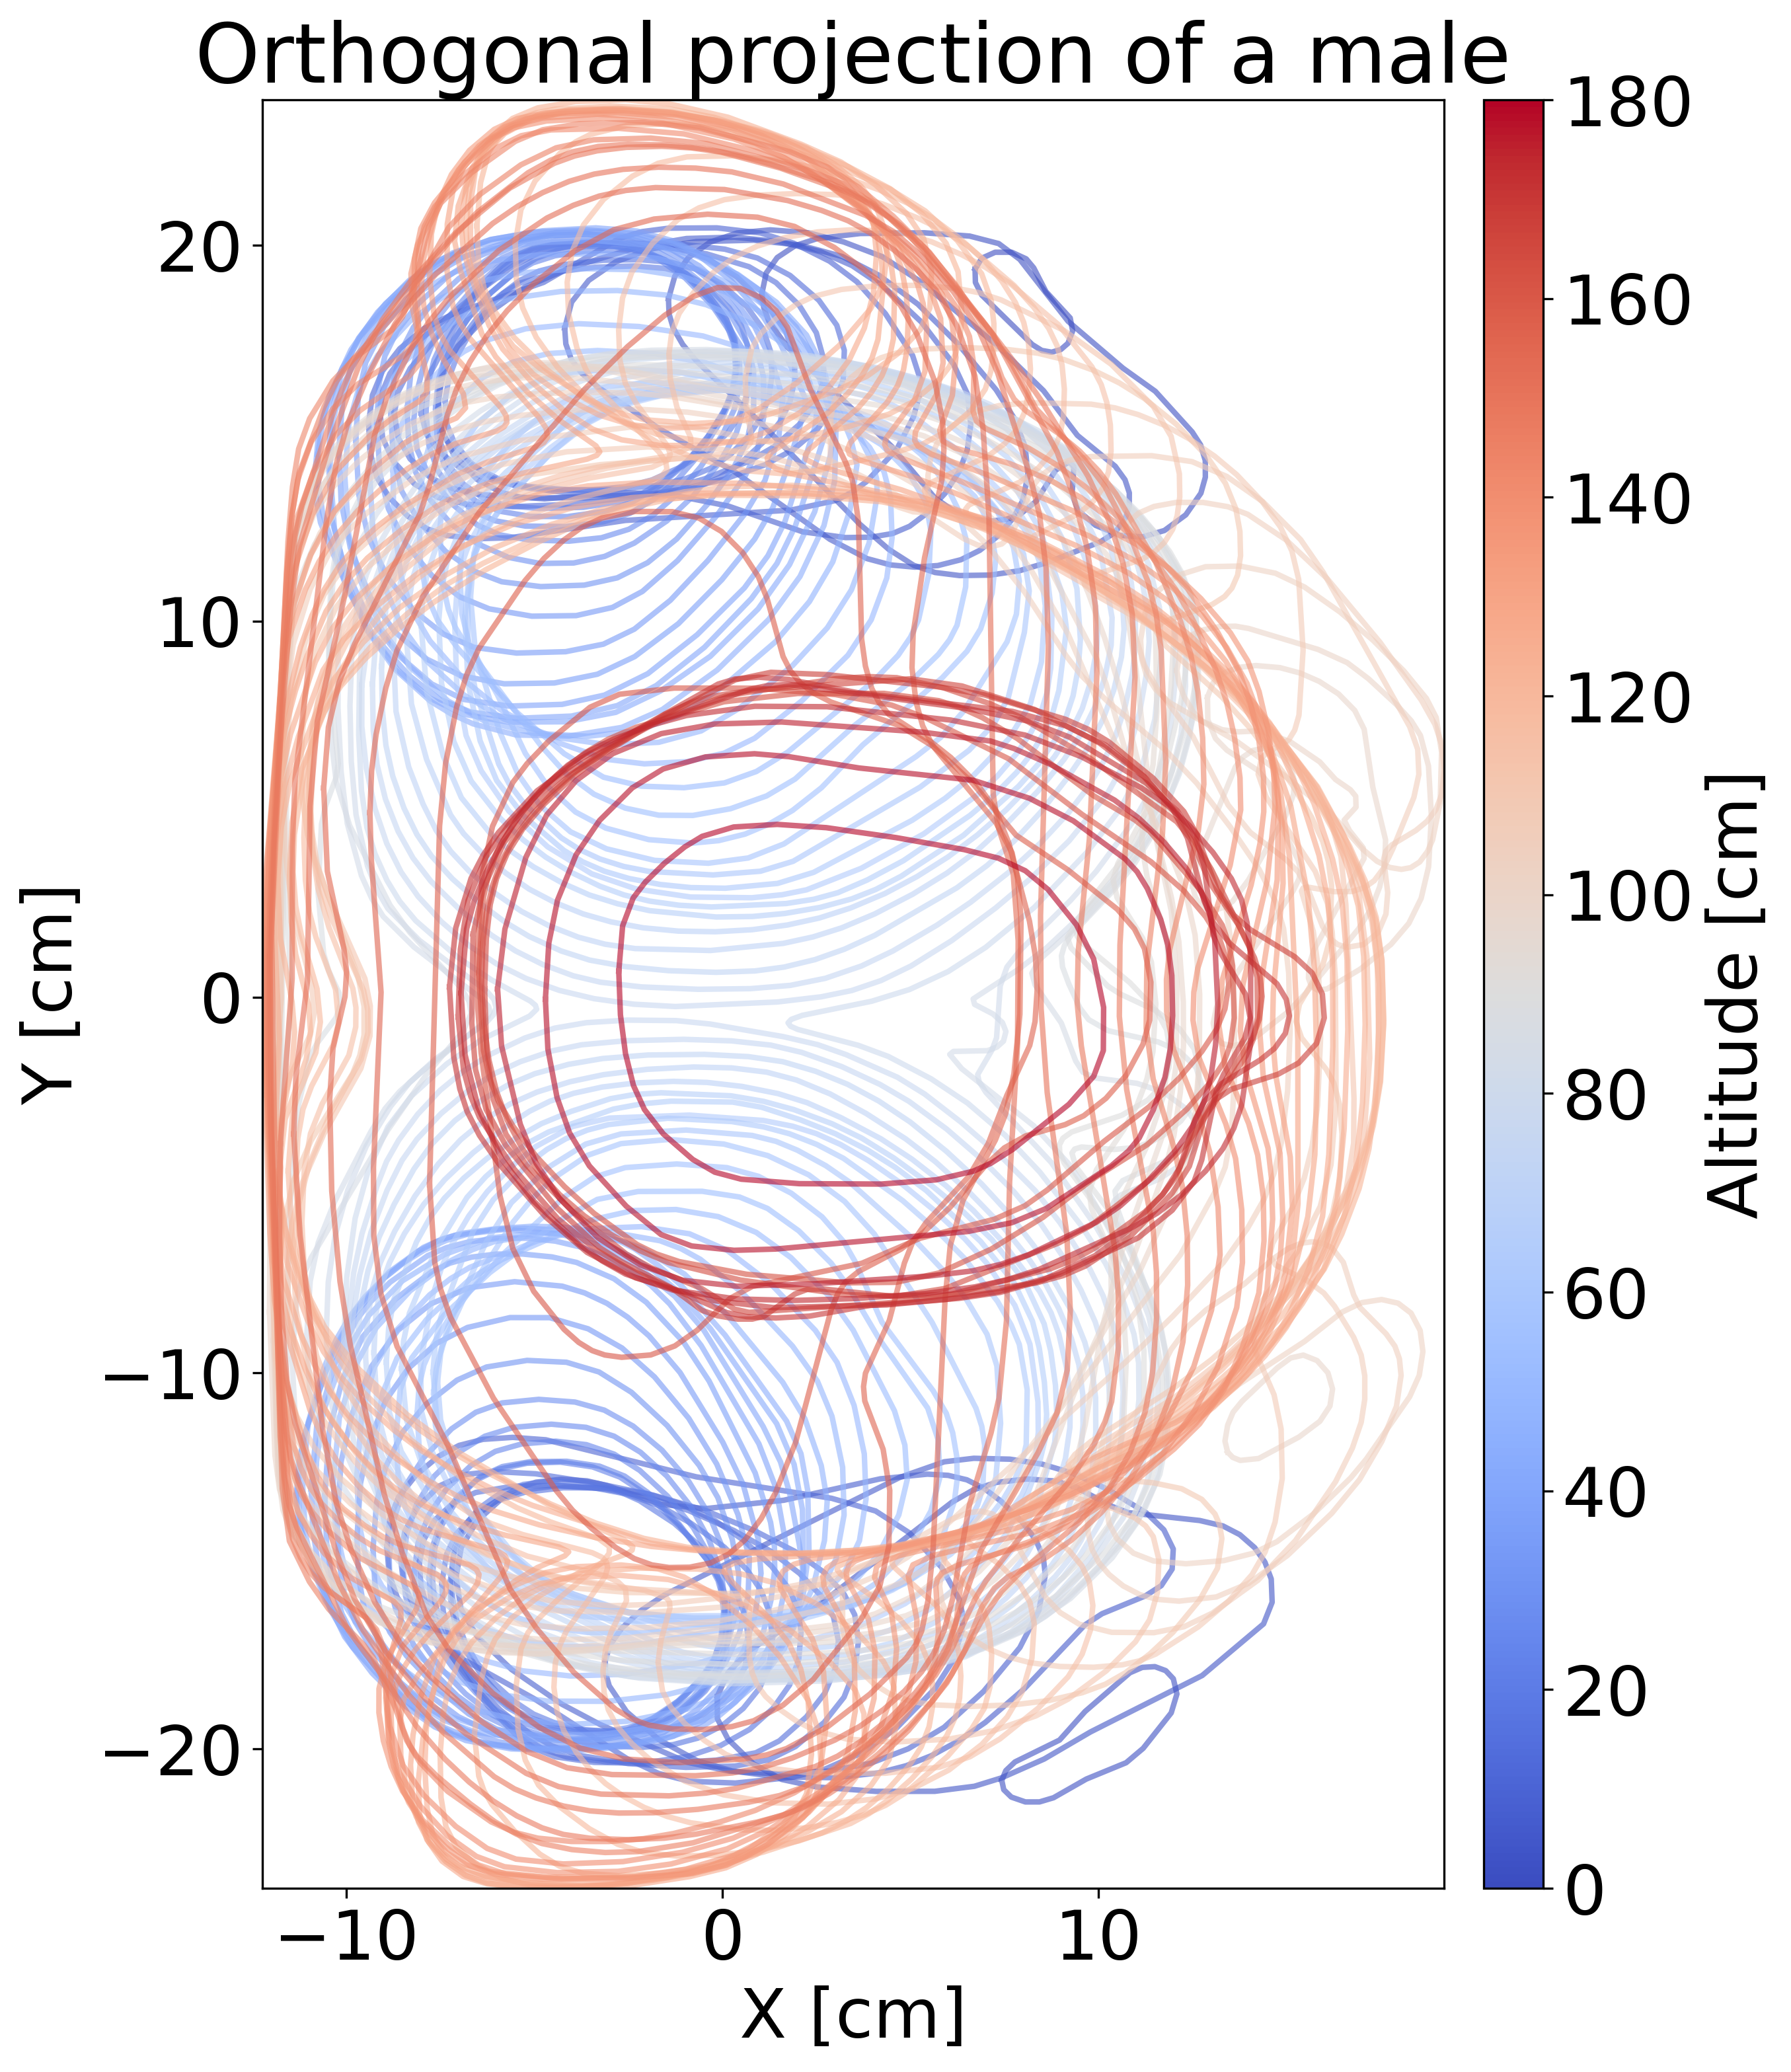

In [2]:
from streamlit_app.plot import plot
from matplotlib.figure import Figure
import matplotlib.pyplot as plt

fig: Figure = plot.display_body3D_orthogonal_projection(current_agent)
plt.show()

#### Plot the superposition of MultiPolygon (one MultiPolygon per height)

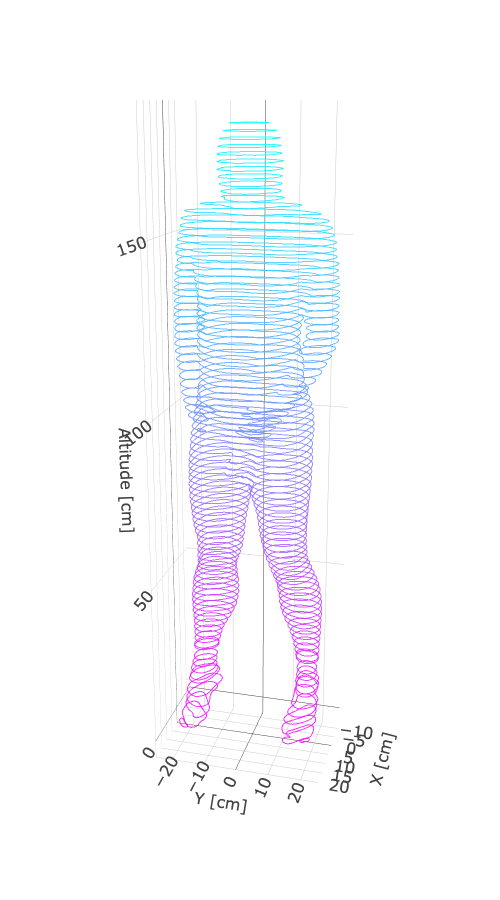

In [3]:
import plotly.graph_objects as go
from IPython.display import Image
from pathlib import Path

# Create a 3D plot of the agent using Plotly
fig_plotly: go.Figure = plot.display_body3D_polygons(current_agent)

# Display the generated Plotly figure in the documentation
path_data = Path.cwd().parent.parent / "data"
fig_plotly.write_image(path_data / "images" / "generated" / "pedestrian3D_multipolygon.png", format="png")
Image(path_data / "images" / "generated" / "pedestrian3D_multipolygon.png")

#### Plot the mesh

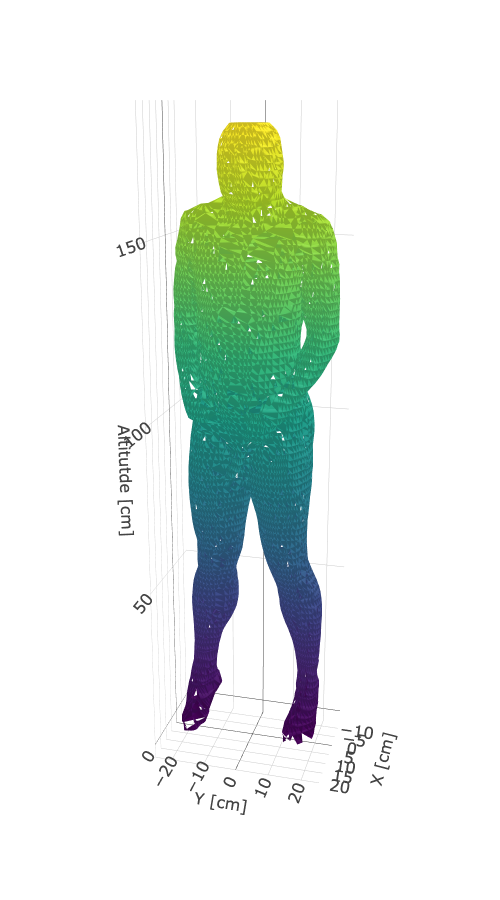

In [4]:
fig_plotly_mesh: go.Figure = plot.display_body3D_mesh(current_agent, precision=60)

# Display the generated Plotly figure in the documentation
fig_plotly_mesh.write_image(path_data / "images" / "generated" / "pedestrian3D_mesh.png", format="png")
Image(path_data / "images" / "generated" / "pedestrian3D_mesh.png")

## Display the content of the dictionary defining the 3D pedestrians

In [5]:
# Retrieve additional parameters for 2D shapes associated with the current agent (in centimeters)
shapes: dict[float, MultiPolygon] = current_agent.shapes3D.shapes

# Print only the first 10 elements (height and geometry) from the shapes dictionary
for i, (height, geometry) in enumerate(shapes.items()):
    if i >= 10:  # Stop after printing 10 elements
        break
    print(f"Height: {height:.3f} cm, Geometry: {geometry}")

Height: 0.000 cm, Geometry: MULTIPOLYGON (((6.721004686269752 19.365775200068718, 6.899593592831185 19.655861531618086, 7.255038721477846 19.814830255000942, 7.696162338940444 19.81508163778932, 8.081881266985924 19.63858341589731, 8.280651139457074 19.400499607512565, 8.60680279528113 18.768149366067348, 9.252068344871095 18.06694699227554, 9.317613260108615 17.72174007675582, 9.192998001240738 17.392167991347115, 9.001740522581944 17.226037400439708, 8.757549689295793 17.156351829731, 8.495858329965994 17.202197772269045, 8.242613538372964 17.359825802151498, 6.898258768613528 18.676789653101814, 6.730433420513649 19.01127740865561, 6.721004686269752 19.365775200068718)))
Height: 1.166 cm, Geometry: MULTIPOLYGON (((7.431869751071063 -20.83769359091587, 7.539313088605408 -20.577700637645258, 7.7829959738959085 -20.346950722726824, 8.96987679970874 -19.764222627598983, 9.649746328935478 -19.00367528261593, 10.840853966956931 -17.974113818869995, 11.171059453899115 -17.831334004742097, 